##  Bivarite
1) Numeric column(y_axis) Vs Categorical column(x_axis, target) [plot_bivariate_distribution_num_vs_cat] ✅
2) Grouped bar plot for cross tab [grouped_cross_tab_bar] ✅ (x-cat, y-num, groupby-cat)
3) Category column(x_axis), Numerical column(y_axis), Groupby Category column(legend) ✅ [plot_grouped_bar_chart]

## Univariate
1) Count plots (categorical columns) [plot_univariate_distribution_categorical_features] ✅
2) Histogram (numerical columns) [plot_histogram] ✅


## Multivariate
1) Seaborn Pair plot ✅ [sns.pairplot]
2) Scatter plot ✅ [plot_scatter] (num, num, cat)
3) Correlation matix ✅ [plot_corr_matrix_num_features]

## Make a cross_tab
[cross_tab_df] ✅ (2 categorical column)


In [1]:
d = {'key': 1, 'key2': 22}

# To get the value of 'key'
d['key']

1

In [2]:
# Can not work like this
d.key

AttributeError: 'dict' object has no attribute 'key'

In [3]:
# With ConfigBox it would

from box import ConfigBox
d = ConfigBox({'key': 1, 'key2': 22})

print(type(d))
print(d.key)

<class 'box.config_box.ConfigBox'>
1


In [1]:
import pandas as pd
data = {
    'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Age': [10, 15, 14, 10, 16, 12],
    'Value': [20, 30, 10, 20, 13, 12],
    'Sex': ['G1', 'G2', 'G1', 'G2', 'G1', 'G2']
}
df_sample = pd.DataFrame(data)
df_sample

,Category,Age,Value,Sex
0,A,10,20,G1
1,A,15,30,G2
2,B,14,10,G1
3,B,10,20,G2
4,C,16,13,G1
5,C,12,12,G2


## plot_grouped_bar_chart (1 plot)

In [ ]:
from mlproject.utils.common import plot_grouped_bar_chart

plot_grouped_bar_chart(df_sample, x_column='Category',
    y_column='Age',
    group_column='Sex',
    title='Sample Grouped Bar Chart',    
    orientation='v')

In [5]:
import pandas as pd

loans = pd.DataFrame({
    'Security_Type': ['Secured', 'Secured', 'Unsecured', 'Secured', 'Unsecured', 'Unsecured', 'Secured', 'Unsecured'],
    'Status_str': ['Default', 'Non default', 'Default', 'Non default', 'Default', 'Non default', 'Default', 'Default']
})
loans

,Security_Type,Status_str
0,Secured,Default
1,Secured,Non default
2,Unsecured,Default
3,Secured,Non default
4,Unsecured,Default
5,Unsecured,Non default
6,Secured,Default
7,Unsecured,Default


## cross_tab_df

In [6]:
from mlproject.utils.common import cross_tab_df, grouped_cross_tab_bar

cross = cross_tab_df(loans, 'Security_Type', 'Status_str')
cross

Status_str,Default,Non default,Percentage_Default
Security_Type,,,
Secured,2,2,50.0%
Unsecured,3,1,75.0%


In [7]:
# Step 1: Melt the DataFrame to long format
cross_tab_melted = cross[['Default', 'Non default']].reset_index().melt(id_vars='Security_Type', var_name='Status_str', value_name='Count')
cross_tab_melted

,Security_Type,Status_str,Count
0,Secured,Default,2
1,Unsecured,Default,3
2,Secured,Non default,2
3,Unsecured,Non default,1


## grouped_cross_tab_bar

In [8]:
grouped_cross_tab_bar(cross_tab_melted, x_column='Security_Type', y_column='Count', group_by='Status_str')

In [2]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(loans['Security_Type'], loans['Status_str'])
cross_tab

Status_str,Default,Non default
Security_Type,,
Secured,2,2
Unsecured,3,1


#### The `pd.crosstab()` function creates a table that counts occurrences of each combination of Security_Type and Status_str. Here, cross_tab will **count how many "Default" and "Non default" cases there are for each Security_Type ("Secured" or "Unsecured").**

In [3]:
# Calculate the percentage of Defaulted ones
cross_tab['Percentage_defaulted'] = ((cross_tab['Default'] / (cross_tab['Non default'] + cross_tab['Default'])) * 100).round(2)
cross_tab

Status_str,Default,Non default,Percentage_defaulted
Security_Type,,,
Secured,2,2,50.0
Unsecured,3,1,75.0


## plot_bar ( categorical and Numeric) 1 plot

In [10]:
a = {
    'Category': ['A', 'B', 'C'],
    'Values': [100, 200, 150]
}
df = pd.DataFrame(a)

from mlproject.utils.common import plot_bar

plot_bar(df, 'Category', 'Values')


In [41]:
cross_tab

Status_str,Default,Non default,Percentage_defaulted
Security_Type,,,
Secured,2,2,50.0
Unsecured,3,1,75.0


### Transform cross_tab for Grouped Bar Plotting

In [34]:
# Step 1: Melt the DataFrame to long format
cross_tab_melted = cross_tab[['Default', 'Non default']].reset_index().melt(id_vars='Security_Type', var_name='Status_str', value_name='Count')
cross_tab_melted

,Security_Type,Status_str,Count
0,Secured,Default,2
1,Unsecured,Default,3
2,Secured,Non default,2
3,Unsecured,Non default,1


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
type(cross_tab_melted)

pandas.core.frame.DataFrame

In [ ]:
import plotly.express as px

def grouped_cross_tab_bar(cross_tab_melted: pd.DataFrame, x_column: str, y_column: str, group_by: str):
    try:
        # Step 2: Create the grouped bar chart with Plotly
        fig = px.bar(
            cross_tab_melted,
            x=x_column,
            y=y_column,
            color=group_by,
            barmode='group',
            title=f'Distribution of {x_column} with {y_column}',
            labels={x_column: x_column, y_column: y_column},
            # color_discrete_map={'Default': '#87CEEB', 'Non default': '#FFA07A'}  # Colors for each category
        )

        # Customize layout
        fig.update_layout(
            title_font=dict(size=20, color='#005ce6'),
            xaxis=dict(title=x_column),
            yaxis=dict(title=y_column),
            bargap=0.2  # Space between bars in each group
        )

        # Display the plot
        fig.show()
        
    except Exception as e:
        raise ValueError('Error ploting group cross tab bar.') from e

In [ ]:
# Categorical Vs Categrical

grouped_cross_tab_bar(cross_tab_melted, x_column='Security_Type', y_column='Count', group_by='Status_str')

In [ ]:
def cross_tab_df(df: pd.DataFrame, cat_col: str, target_cat_col: str) -> pd.DataFrame:
    """Creates a crosstab of the specified categorical column against the target column,
    and calculates the percentage for one of the target column values.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        cat_col (str): Column name of the categorical feature to group by (e.g., 'Security_Type').
        target_cat_col (str): Categorical Column name of the target variable to calculate distribution (e.g., 'Status_str').

    Raises:
        ValueError: If there’s an error in creating the crosstab.

    Returns:
        pd.DataFrame: Crosstab with counts and percentage of a specific target value.
    
    """
    try:
        # Create the crosstab (counts for each combination of cat_col and target_col values)        
        cross_tab = pd.crosstab(df[cat_col], df[target_cat_col])
        
        # Ensure unique target column values for dynamic naming
        target_values = df[target_cat_col].unique()
        
        if len(target_values) != 2:
            raise ValueError("The target column must have exactly two unique values.")

        # Calculate the percentage of the first target column value (e.g., 'Default')
        main_target = target_values[0]
        other_target = target_values[1]

        cross_tab[f'Percentage_{main_target}'] = (
            (cross_tab[main_target] / (cross_tab[main_target] + cross_tab[other_target])) * 100
        ).round(2).astype(str) + '%'
        
        return cross_tab
    except Exception as e:
        raise ValueError('Error creating cross tab.') from e

In [51]:
import pandas as pd
# Data for univariate
data1 = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Salary': [50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000],
    'Years_of_Experience': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20],
    'Performance_Score': [3, 4, 2, 5, 3, 4, 4, 5, 3, 5]
}

df1 = pd.DataFrame(data1)

# Plotting with Seaborn
numerical_features = ['Age', 'Salary', 'Years_of_Experience']
column_name_num = 'Performance_Score'

## plot_scatter

In [9]:
from mlproject.utils.common import plot_scatter

loans2 = pd.DataFrame({
    'loan_amount': [100000, 150000, 200000, 250000, 300000, 120000, 180000, 220000, 260000, 310000],
    'property_value': [300000, 350000, 400000, 450000, 500000, 320000, 380000, 420000, 460000, 510000],
    'Status_str': ['Approved', 'Denied', 'Approved', 'Denied', 'Approved', 'Denied', 'Approved', 'Denied', 'Approved', 'Denied']
})

plot_scatter(loans2, 'loan_amount', 'property_value', 'Status_str')

In [3]:
# data for bivariate
data2 = {
    'Department': ['Sales', 'HR', 'IT', 'Sales', 'HR', 'IT', 'Sales', 'HR', 'IT', 'Sales'],
    'Education_Level': ['Bachelors', 'Masters', 'PhD', 'Bachelors', 'Masters', 'PhD', 'Bachelors', 'Masters', 'PhD', 'Bachelors'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Performance_Score': [3, 4, 2, 5, 3, 4, 4, 5, 3, 5]
}

df2 = pd.DataFrame(data2)

# Plotting with Seaborn
categorical_features = ['Department', 'Education_Level', 'Gender']
column_name_cat = 'Performance_Score'
numeric_col = 'Performance_Score'

In [4]:
len(categorical_features) // 2 + len(categorical_features) % 2

2

## plot_univariate_distribution_categorical_features

In [4]:
# Categorical distr
from mlproject.utils.common import plot_univariate_distribution_categorical_features

plot_univariate_distribution_categorical_features(df2, categorical_features)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
data1 = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Salary': [50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000],
    'Years_of_Experience': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female']
}

df1 = pd.DataFrame(data1)

# Plotting with Seaborn
numerical_features = ['Age', 'Salary', 'Years_of_Experience']
cat_column_name = 'Gender'

## plot_bivariate_distribution_num_vs_cat

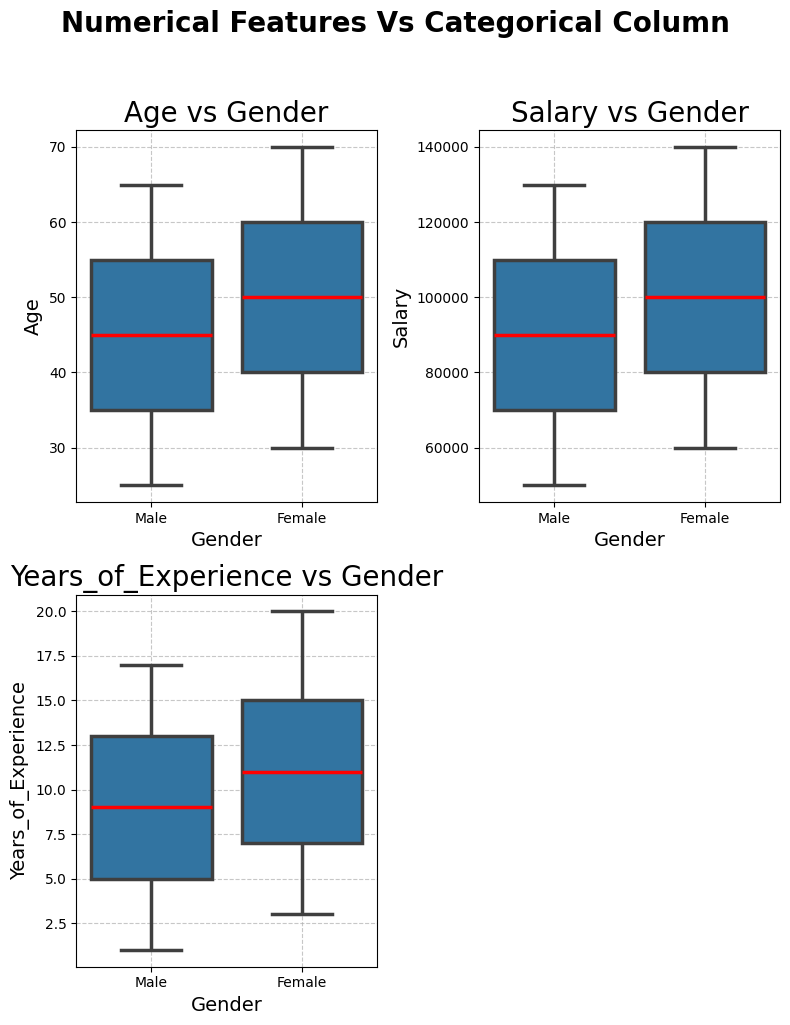

In [2]:
from mlproject.utils.common import plot_bivariate_distribution_num_vs_cat

plot_bivariate_distribution_num_vs_cat(df1, numerical_features, cat_column_name, 2)

## Correlation matrix

In [13]:
from mlproject.utils.common import plot_corr_matrix_num_features

plot_corr_matrix_num_features(df1, numerical_features)

<Axes: xlabel='Age', ylabel='Count'>

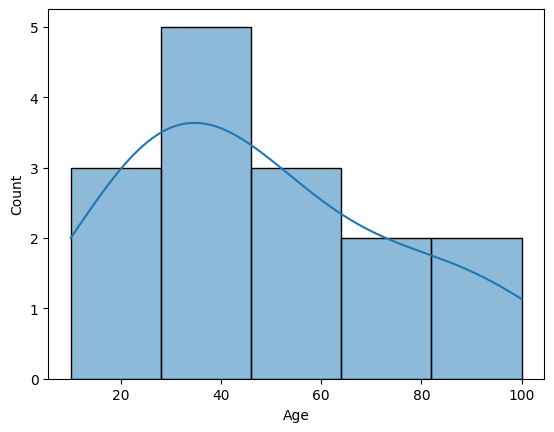

In [4]:
import pandas as pd
import seaborn as sns

data = {
    'Age': [10, 20, 20, 30, 30, 30, 40, 40, 50, 50, 60, 70, 80, 90, 100]
}
df_sample = pd.DataFrame(data)
sns.histplot(data, x='Age', kde=True)


# # Example usage of the function
# plot_histogram(
#     df=df1,
#     column_name='Age', kde=False
#     # title="Sample Histogram"
# )

## Histogram

In [6]:
from mlproject.utils.common import plot_histogram
plot_histogram(df_sample, 'Age')


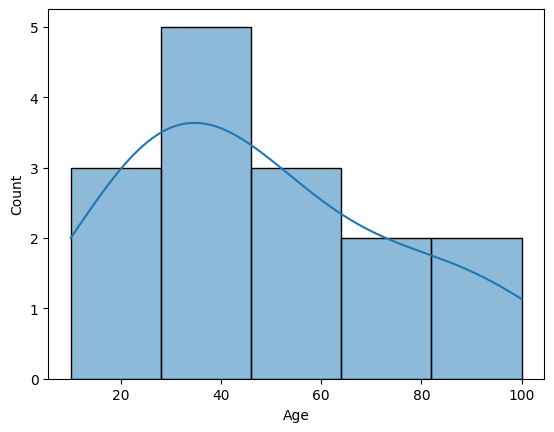

In [8]:
plot_histogram(df_sample, 'Age', kde=True)